**1. Implement Naive Bayes Classifier algorithm without using inbuilt functions.**

dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],

'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],

'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],

'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = {'Taste':['Salty','Spicy','Spicy','Spicy','Spicy','Sweet','Salty','Sweet','Spicy','Salty'],

'Temperature':['Hot','Hot','Hot','Cold','Hot','Cold','Cold','Hot','Cold','Hot'],

'Texture':['Soft','Soft','Hard','Hard','Hard','Soft','Soft','Soft','Soft','Hard'],

'Eat':['No','No','Yes','No','Yes','Yes','No','Yes','Yes','Yes']}
df=pd.DataFrame(dataset)
def calculatepriors(df,target_col):
  values,counts=np.unique(df[target_col],return_counts=True)
  total=np.sum(counts)
  priors={values[i]:counts[i]/total for i in range(len(values))}
  return priors

def calculatelikelihoods(df,target_col,features):
  likelihood={}
  for feature in features:
    likelihood[feature]={}
    for val in np.unique(df[feature]):
      likelihood[feature][val]={}
      for cls in np.unique(df[target_col]):
        num=len(df[(df[feature]==val)&(df[target_col]==cls)])
        den=len(df[df[target_col]==cls])
        likelihood[feature][val][cls]=num/den if den>0 else 0.0
  return likelihood
def predict(query, prior,likelihood):
  prob_class={}
  for cls,prob in prior.items():
    post=prob
    for feature,val in query.items():
      post*=likelihood[feature][val].get(cls,1e-6)
    prob_class[cls]=post
  best_class=max(prob_class,key=prob_class.get)
  return best_class,prob_class


features=["Taste","Temperature","Texture"]
target="Eat"
priors=calculatepriors(df,target)
likelihoods=calculatelikelihoods(df,target,features)
test_input={'Taste': 'Spicy', 'Temperature': 'Cold', 'Texture': 'Soft'}
prediction,probabilities=predict(test_input,priors,likelihoods)
print("Test Input:",test_input)
print("Predicted Class:",prediction)
print("Posterior Probabilities:",probabilities)


Test Input: {'Taste': 'Spicy', 'Temperature': 'Cold', 'Texture': 'Soft'}
Predicted Class: No
Posterior Probabilities: {'No': np.float64(0.07500000000000001), 'Yes': np.float64(0.049999999999999996)}


**2. Implement Decision tree on IRIS Dataset using SK Learn library functions. Implement methods to avoid over-fitting of the data.**


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0
Cross-validation accuracy scores: [0.96666667 1.         0.86666667 0.86666667 1.        ]
Mean CV accuracy: 0.9400000000000001


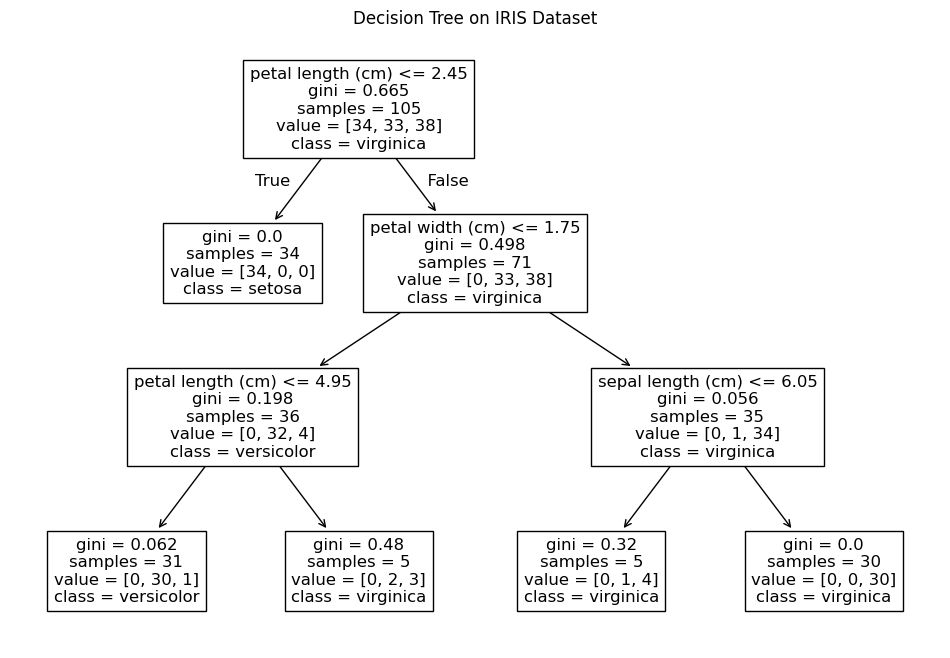

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(
criterion='gini',
max_depth=3,
min_samples_leaf=5,
random_state=42
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
cv_scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree on IRIS Dataset")
plt.show()